In [284]:
# Datos
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
df = pd.read_csv("./dataset/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Analisis exploratorio de datos

Tipos de datos de cada columna del DataFrame deberían ser los siguientes:

- `App`: object (cadena de texto)
- `Category`: object (cadena de texto)
- `Rating`: float64 (número decimal)
- `Reviews`: int64 (número entero)
- `Size`: object (cadena de texto)
- `Installs`: int64 (número entero)
- `Type`: object (cadena de texto)
- `Price`: float64 (número decimal)
- `Content Rating`: object (cadena de texto)
- `Genres`: object (cadena de texto)
- `Last Updated`: datetime64[ns] (fecha y hora)
- `Current Ver`: object (cadena de texto)
- `Android Ver`: object (cadena de texto)

In [256]:
# Información del dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [109]:
# Calcular el número de NaN por columna
nan_count = df.isnull().sum()

# Mostrar solo las columnas con más de cero NaN
print(nan_count[nan_count > 0])

Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64


## Analizamos los tipos de datos

## Columna `Category`

In [310]:
# La variable "Category", la consideramos como categórica. Con esto nos ahorraremos un poco de memoria.
print("Cantidad de caterias en 'Category':", df["Category"].value_counts().count())
df["Category"] = df["Category"].astype("category")

Cantidad de caterias en 'Category': 33


## Columna `Rating`

In [299]:
df['Rating'] = df['Rating'].fillna(0)   # Reemplazamos los NaN por 0, 0 = Sin calificación.
df['Rating'] = df['Rating'].astype("int32")

## Columna Rewiers

La variable "Reviews" la consideramos como numérica.
```python
df["Reviews"] = df["Reviews"].astype('int32')
```
Se produce un error: invalid literal for int() with base 10: '3.0M'

In [179]:
# Busco el dato incorrecto en la columna "Reviews"
df[df["Reviews"] == '3.0M'] # Buscar
df.loc[10472, "Reviews"] = 3E6 # Reemplazar

In [181]:
# La variable "Reviews" la consideramos como numérica.
df["Reviews"] = df["Reviews"].astype('int32')

Si ubiese existido más de un dato incorrecto, se podría haber utilizado el siguiente código:
```python
def convert_millions(value):
    if isinstance(value, str):  # Comprueba si el valor es una cadena de texto
        if 'M' in value:  # Si la cadena contiene 'M'
            # Elimina 'M', convierte a float y multiplica por un millón
            return float(value.replace('M', '')) * 1e6
        else:
            # Si no contiene 'M', simplemente convierte a float
            return float(value)
    else:
        # Si el valor no es una cadena, déjalo como está
        return value

# Aplica la función a la columna "Reviews"
df["Reviews"] = df["Reviews"].apply(convert_millions).astype('int64')
```

## Columna `Size`

In [115]:
# La columna "Size" es de tipo object, pero tiene valores numéricos y letras. Ences la podemos colocar como una variable categórica.
df["Size"].value_counts().count() # Cantidad de valores únicos

462

df["Installs"]

In [116]:
df["Installs"].value_counts().count()

22

In [117]:
df["Type"].value_counts()

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64

## `Price`

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             10841 non-null  object  
 1   Category        10841 non-null  category
 2   Rating          9367 non-null   float16 
 3   Reviews         10841 non-null  int32   
 4   Size            10841 non-null  object  
 5   Installs        10841 non-null  object  
 6   Type            10840 non-null  object  
 7   Price           10841 non-null  object  
 8   Content Rating  10840 non-null  object  
 9   Genres          10841 non-null  object  
 10  Last Updated    10841 non-null  object  
 11  Current Ver     10833 non-null  object  
 12  Android Ver     10838 non-null  object  
dtypes: category(1), float16(1), int32(1), object(10)
memory usage: 922.5+ KB


In [188]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4689,Mod GTA V for MCPE,FAMILY,3.300781,4288,10M,"500,000+",Free,0,Everyone,Entertainment,"April 23, 2018",1.2.3.4.5,4.0.3 and up
10652,FutureNet your social app,SOCIAL,4.199219,2093,7.0M,"100,000+",Free,0,Teen,Social,"March 8, 2018",3.36,4.2 and up
851,Sago Mini Hat Maker,EDUCATION,4.898438,11,63M,"1,000+",Paid,$3.99,Everyone,Education;Pretend Play,"July 24, 2017",1.0,4.0.3 and up
3887,CompTIA A+ Pocket Prep,FAMILY,4.300781,1311,14M,"10,000+",Free,0,Everyone,Education,"July 11, 2018",4.5.2,4.4 and up
4196,H-Connect,HEALTH_AND_FITNESS,4.000000,50,15M,"5,000+",Free,0,Everyone,Health & Fitness,"July 3, 2018",2.14,4.4 and up


In [203]:
# La columna "Price" es de tipo object, pero tiene valores numéricos y letras ($). Eliminos el signo "$" y la convertimos a numérica.
df["Price"] = df["Price"].astype("str").str.replace("$", "")

# reemplazar el dato incorrecto en la columna "Price" -> "Everyone" y se reemplaza por 0.
df.loc[df["Price"] == "Everyone", "Price"] = 0

# La variable "Price" la consideramos como numérica.
df["Price"] = df["Price"].astype("float16")


## `Content Rating`

In [206]:
# Es una variable categorica.
df["Content Rating"] = df["Content Rating"].astype("category")

## `Genres`

In [237]:
a = df["Genres"].value_counts();
print("cantidad de generos:", a.count())

cantidad de generos: 120


In [236]:
# La variable "Genres" contine varios generos separados por ";" o "&".
# Con esto buscamos en las categorias.
mask = a.index.str.contains("Strategy")
result = a[mask]
print(result)

Genres
Strategy                       107
Strategy;Action & Adventure      2
Strategy;Education               1
Strategy;Creativity              1
Name: count, dtype: int64


## Columna `Last Updated` (fecha)

Dato incorrecto
```python
# Convertir la columna 'fecha' a tipo fecha
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# ERROR
time data "1.0.19" doesn't match format "%B %d, %Y", at position 10472. You might want to try:
```

In [238]:
# Corregimos el dato incorrecto en la columna "Last Updated" de la posición 10472
df.loc[10472, "Last Updated"] = "January 1, 2019"

In [239]:
# Convertir la columna 'fecha' a tipo fecha
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

## Columna Android Ver

In [123]:
df["Android Ver"].value_counts().count()

33

In [138]:
df["Current Ver"].value_counts().count()

2832

# Graficos

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  category      
 2   Rating          9367 non-null   float16       
 3   Reviews         10841 non-null  int32         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float16       
 8   Content Rating  10840 non-null  category      
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: category(2), datetime64[ns](1), float16(2), int32(1), object(7)
memory usage: 785.1+ KB


In [301]:
df[df["Rating"] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


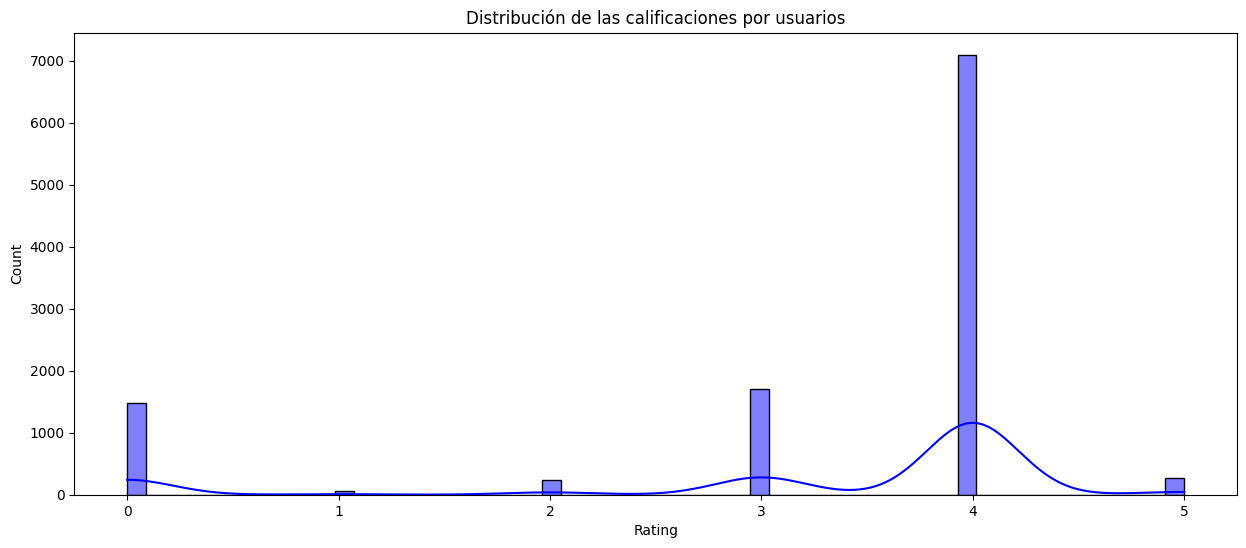

In [309]:
plt.figure(figsize=(15, 6))
# Realizo un gráfico de histograma para ver la distribución de la variable "Rating" usando seaborn.
sns.histplot(data=df, x='Rating', kde=True, color='blue')
plt.title('Distribución de las calificaciones por usuarios')
#plt.xticks(np.arange(0, 20, 1))
#plt.yticks(np.arange(0, 1200, 100))
plt.show()

In [ ]:

plt.xlabel('Edad')
plt.ylabel('Cantidad de sobrevivientes')
plt.xticks(np.arange(0, 85, 5))
plt.yticks(np.arange(0, 17, 1))
plt.show()